In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [12]:
week = 24  # time length of total observation (in weeks)
weight = 190  # unit in lbs       OPTIONS: '230'; '190'; '150'; '120'
n = 56  # number of measurements per week
dist = 'normal'  # Daily weight fluctuation:  'normal' or 'uniform'

In [13]:
print("\nAssuming average height is 5'9'' for an adult man")
print("\nTotal weight loss time = ", week, "weeks")
print("Starting Weight = ", weight, "pounds")
print("Number of measurements per week = ", n)

if dist == 'uniform':
    print('\nUNIFORM Distribution for Daily Weight Fluctuation')
elif dist == 'normal':
    print("\nNORMAL Distribution for Daily Weight Fluctuation")


if weight == 230:  # BMI = 34:    230 lbs   use 1.5% weight reduction (Obese)
    txt = "BMI = 34:   1.5% weight reduction (Obese)"
    print(txt)
    wl = 1 - 0.015
elif weight == 190:  # BMI = 28:    190 lbs   use 1.0% weight reduction (Overweight)
    txt = "BMI = 28:   1.0% weight reduction (Overweight)"
    print(txt)
    wl = 1 - 0.01
elif weight == 150:  # BMI = 22:    150 lbs   use 0.5% weight reduction (Normal)
    txt = "BMI = 22:   0.5% weight reduction (Healthy)"
    print(txt)
    wl = 1 - 0.005
elif weight == 120:  # BMI = 18.5:  120lbs    use no weight reduction (Normal lean)
    txt = "BMI = 18.5: no weight reduction (Lean)"
    print(txt)
    wl = 1 - 0


Assuming average height is 5'9'' for an adult man

Total weight loss time =  24 weeks
Starting Weight =  190 pounds
Number of measurements per week =  56

NORMAL Distribution for Daily Weight Fluctuation
BMI = 28:   1.0% weight reduction (Overweight)


In [14]:
df = pd.DataFrame()
# data = np.empty([1, 21])
x = []
y = []


for j in range(n):
    meas = [x for x in range(1, 25)]
    x = np.append(x, meas, axis=0)  # time
x = [int(x) for x in x]
x = sorted(x)
x = np.transpose(x)
# print(x.shape)

for i in range(week):
    time = i + 1
    avg_weight = weight * wl ** i
    # print(time)
    # print("%.2f" % avg_weight)
    if dist == 'uniform':
        ll = avg_weight * (1 - 0.0174)  # 1.74% body fat fluctuation by imaging (or close to the weight fluc)
        ul = avg_weight * (1 + 0.0174)
        w = np.random.uniform(ll, ul, n)  # assuming uniform distribution during a day
    elif dist == 'normal':
        w = np.random.normal(avg_weight, 1.74, n)  # assuming normal distribution during a day
        # w = np.expand_dims(w, axis=0)
        # print(type(w))

    # col_list = ['week' + str(x) for x in range(1, week+1)]
    # weeks = [x for x in range(1, 21)]
    # print(weeks)
    y = np.append(y, w, axis=0)  # weight

y = np.transpose(y)
# print(y.shape)
data = {'Time': [x], 'Weight': [y]}
# print(data)
df = pd.DataFrame(data)
# print(df)

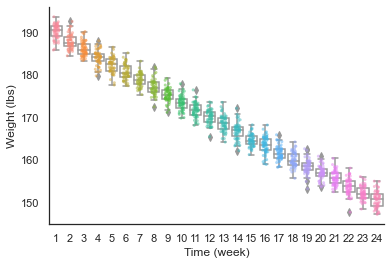

In [15]:
sns.set_style("white")
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
if weight == 120:
    plt.ylim([110, 130])

# ax = sns.swarmplot(x=x, y=y, s=3, alpha=0.6, color='k')
ax = sns.stripplot(x=x, y=y, s=3, alpha=0.5, jitter=0.2)
# ax = sns.stripplot(x=x, y=y, s=3, alpha=0.6, color='k')
# ax = sns.boxplot(x=x,y=y, color='gray')
# ax = sns.boxplot(x=x, y=y, boxprops=dict(alpha=0.5))

ax = sns.boxplot(x=x, y=y, color='white')

# plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
# plt.setp(ax.lines, color='k')

ax.set_xlabel("Time (week)")
ax.set_ylabel("Weight (lbs)")
# ax.set_title(txt)
# plt.title('BMI = 30')
# plt.scatter(x, y)
sns.despine()
plt.show()

# ax = sns.swarmplot(x="week22", y='week1', data=df)

# avg_weight = [weight * i for i in range(2, week)]